<a href="https://colab.research.google.com/github/louzeiro/2023_semestre2/blob/main/Mini_avaliacao_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flaviane Louzeiro da Silva - nUSP: 11885075

In [ ]:
install.packages("gamlss")
install.packages("pammtools")
install.packages("numDeriv")
install.packages("gamlss.cens")
install.packages("broom")
install.packages("ggpubr")
install.packages('survival')
install.packages('EstimationTools')
install.packages("tidyverse")
install.packages("KMsurv")
install.packages("survminer")

Conjunto de dados

In [ ]:
data(std)
head(std)

,obs,race,marital,age,yschool,iinfct,npartner,os12m,os30d,rs12m,⋯,condom,itch,lesion,rash,lymph,vagina,dchexam,abnode,rinfct,time
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,B,S,19,14,3,1,0,0,0,⋯,3,0,0,0,0,0,1,0,0,984
2,2,B,S,23,16,2,2,1,0,0,⋯,2,0,0,0,0,0,1,0,0,984
3,3,W,D,33,12,2,3,1,1,1,⋯,1,0,0,0,0,0,0,0,0,42
4,4,B,S,43,12,3,1,0,0,0,⋯,1,0,0,0,0,0,1,0,1,54
5,5,B,S,30,14,2,2,1,1,1,⋯,2,0,0,0,0,0,1,0,1,77
6,6,B,S,24,11,3,1,0,0,0,⋯,3,0,0,0,0,0,1,0,0,70


# Questão 01) Construa um TTTplot usando as variáveis time e rinfct e com base no gráfico defina qual o possível padrão da função de risco.

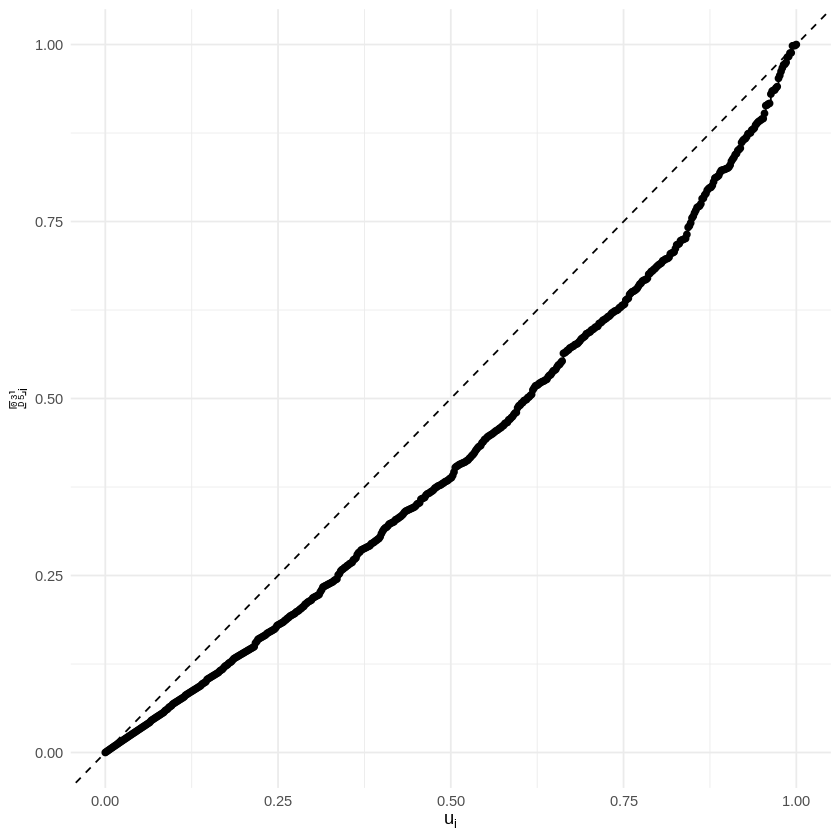

In [ ]:

TTT = TTTE_Analytical(Surv(std$time,std$rinfct)~1, method='censored')

dadosTTT = tibble(
  x = TTT$`i/n`,
  y = TTT$phi_n
)

G =
  dadosTTT %>%
  ggplot(aes(x=x, y=y)) +
  geom_step() +
  geom_point() +
  geom_abline(slope=1, intercept=0, linetype="dashed") +
  lims(y=c(0,1), x=c(0,1)) +
  labs(x = bquote(u[i]), y = bquote(varphi[i])) +
  theme_minimal();

G

Comentário:  A curva aparenta ser convexa, o que sugere que a função de risco é decrescente. Isso indica que o risco de falha diminui ao longo do tempo.

# Questão 02) Qual das seguintes afirmações sobre o gráfico da função de sobrevivência de Kaplan-Meier para os tempos até a reinfecção para pacientes com doenças sexualmente transmissíveis é verdadeira?

Warning message:
“Now, to change color palette, use the argument palette= 'red' instead of color = 'red'”


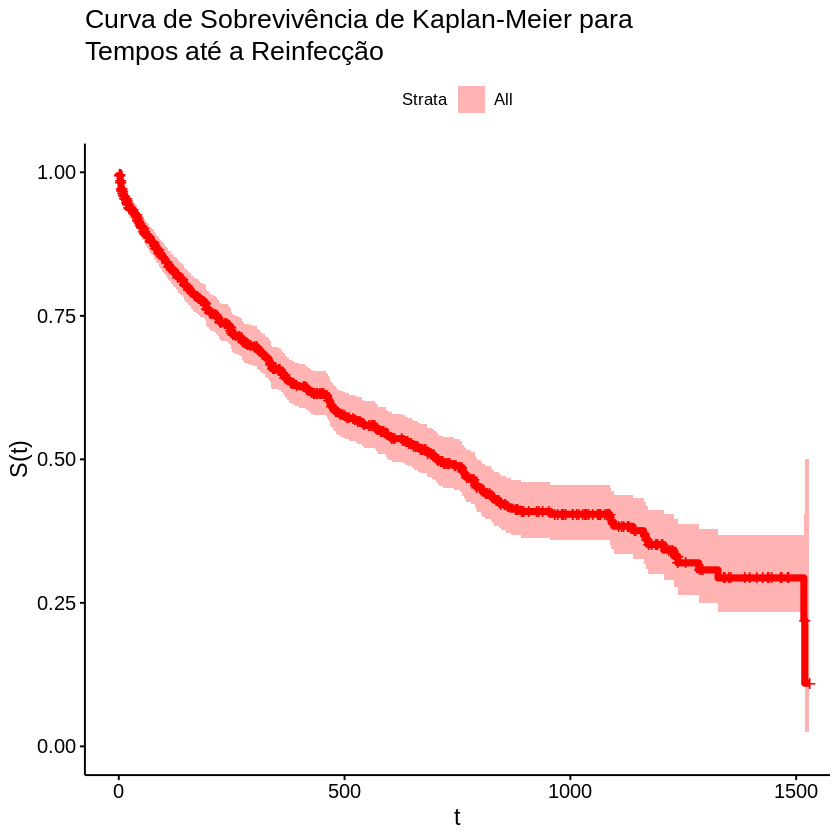

In [ ]:
surv_obj <- Surv(time = std$time, event = std$rinfct)
km_fit <- survfit(surv_obj ~ 1, data = std)
ggsurvplot(km_fit, xlab = "t", ylab = "S(t)",
     title = "Curva de Sobrevivência de Kaplan-Meier para \nTempos até a Reinfecção",
     col = "red", lwd = 2)

Comentário: Observa-se que a função de sobrevivência de Kaplan-Meier começa em 1 e diminui ao longo do tempo, com quedas abruptas em pontos específicos onde ocorrem os eventos de reinfecção. Assim, a função de sobrevivência de Kaplan-Meier é decrescente e apresenta um declínio repentino.

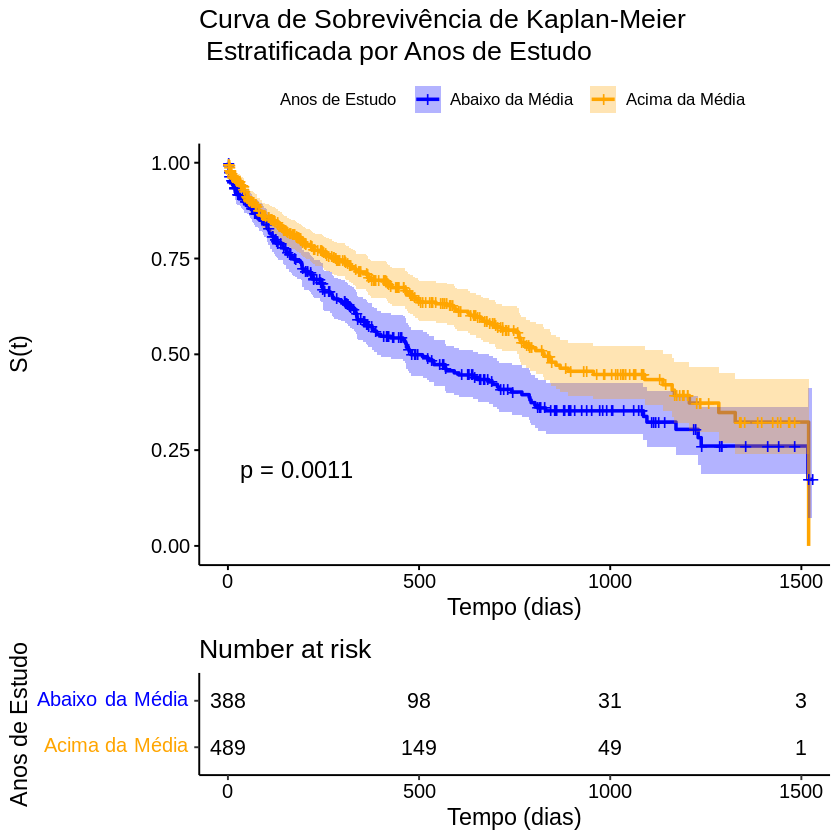

In [ ]:

mean_yschool <- mean(std$yschool, na.rm = TRUE)
std$yschool_cat <- ifelse(std$yschool > mean_yschool, "Acima da Média", "Abaixo da Média")
surv_obj <- Surv(time = std$time, event = std$rinfct)
km_fit <- survfit(surv_obj ~ std$yschool_cat, data = std)

ggsurvplot(km_fit, data = std,
           xlab = "Tempo (dias)", ylab = "S(t)",
           title = "Curva de Sobrevivência de Kaplan-Meier \n Estratificada por Anos de Estudo",
           risk.table = TRUE, pval = TRUE, conf.int = TRUE,
           legend.title = "Anos de Estudo",
           legend.labs = c("Abaixo da Média", "Acima da Média"),
           palette = c("blue", "orange"))


Comentário:
Temos que a resposta correta é ***função de sobrevivência de Kaplan-Meier para o grupo da categoria "> média anos de estudos" é maior que para o grupo da categoria "< média anos de estudos" em todo o estudo, além disso ambas apresentam um declínio gradual***, pois na comparação das Funções de Sobrevivência, observa-se que a curva laranja, que representa o grupo com anos de estudo "Acima da Média", está consistentemente acima da curva azul, que representa o grupo com anos de estudo "Abaixo da Média", indicando uma maior probabilidade de sobrevivência para o grupo com mais anos de estudo em todo o período do estudo. Além disso, ambas as curvas mostram um declínio gradual na probabilidade de sobrevivência ao longo do tempo, sem declínios repentinos. Isso indica que a probabilidade de reinfecção aumenta gradualmente ao longo do tempo para ambos os grupos.
Por fim, o p-valor mostrado no gráfico (p = 0.0011) indica que há uma diferença estatisticamente significativa entre as duas curvas de sobrevivência, sugerindo que a variável yschool influencia significativamente a probabilidade de reinfecção.

# Questão 04) Categorize a variável npartner (Número de parceiros nos últimos 30 dias) em duas categorias tomando a média como ponto de corte e análise: Qual das seguintes afirmações sobre o gráfico da função de sobrevivência de Kaplan-Meier para os tempos até a reinfecção para pacientes com doenças sexualmente transmissíveis estratificada pela variável npartner é verdadeira?

---



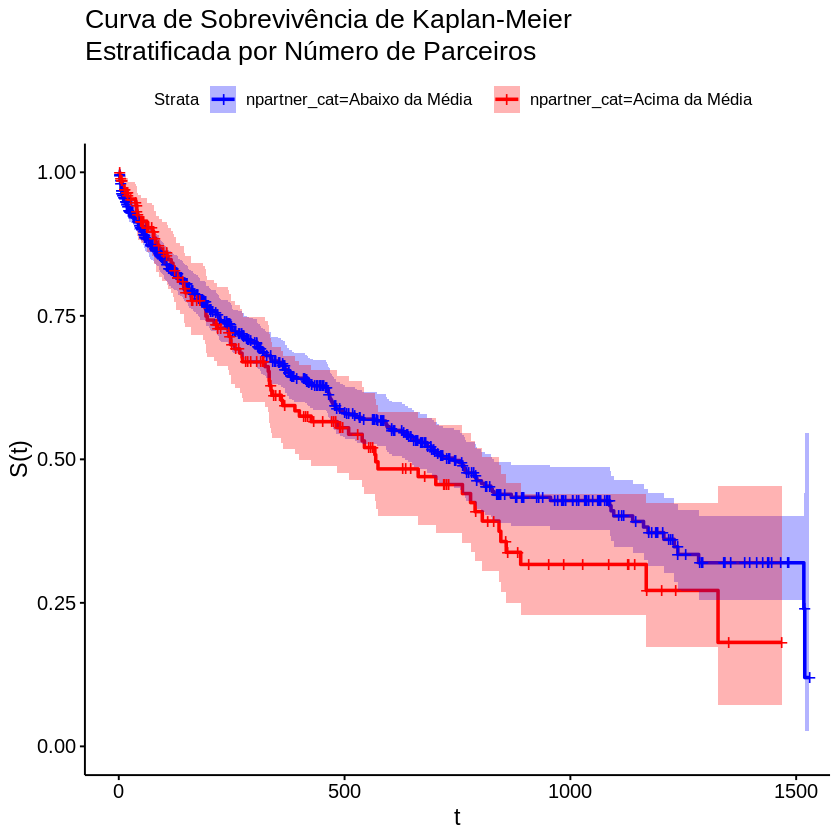

In [ ]:
mean_npartner <- mean(std$npartner, na.rm = TRUE)
std$npartner_cat <- ifelse(std$npartner > mean_npartner, "Acima da Média", "Abaixo da Média")
surv_obj <- Surv(time = std$time, event = std$rinfct)
km_fit <- survfit(surv_obj ~ std$npartner_cat, data = std)

ggsurvplot(km_fit, data = std,
           xlab = "t", ylab = "S(t)",
           title = "Curva de Sobrevivência de Kaplan-Meier \nEstratificada por Número de Parceiros",
           conf.int = TRUE,
           palette = c("blue", "red")
           )

Comentário: A função de sobrevivência de Kaplan-Meier para o grupo da categoria  "> média do nº de parceiros" é bem próxima e superior a função de sobrevivência para o grupo da categoria "<média do nº de parceiros" no intervalo de tempo [0, 100], posteriormente invertendo esta relação até o final do estudo.

# Questão 05) Qual das seguintes afirmações sobre o gráfico da função de sobrevivência de Kaplan-Meier para os tempos até a reinfecção para pacientes com doenças sexualmente transmissíveis estratificada pela variável abdpain – Presença de dor abdominal (1=sim e 0=não) é verdadeira?

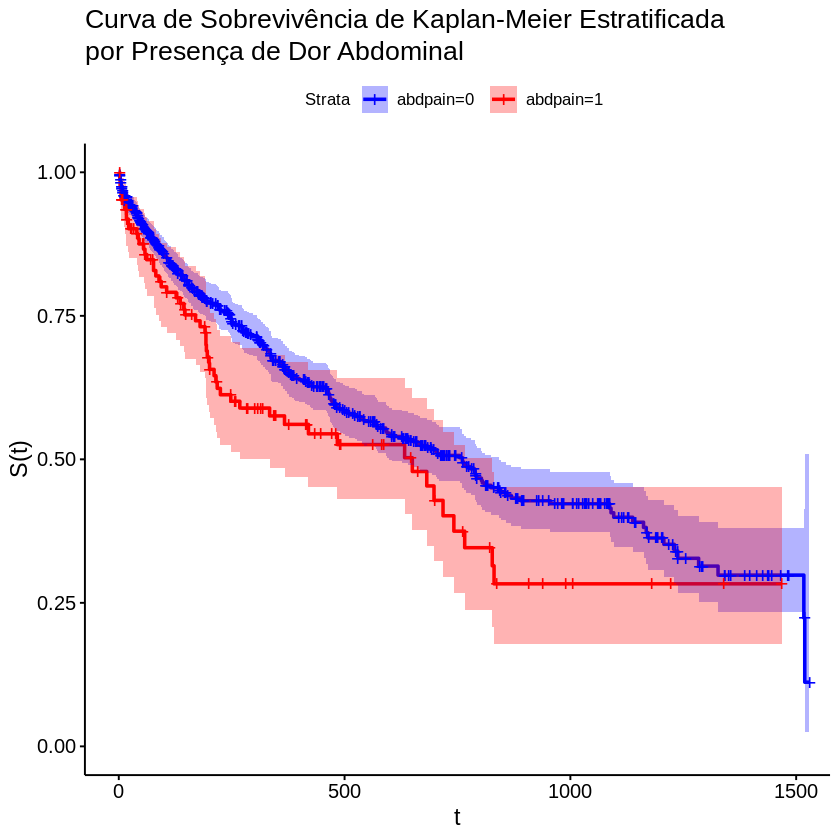

In [ ]:
urv_obj <- Surv(time = std$time, event = std$rinfct)
km_fit <- survfit(surv_obj ~ std$abdpain, data = std)

ggsurvplot(km_fit, data = std,
           xlab = "t", ylab = "S(t)",
           title = "Curva de Sobrevivência de Kaplan-Meier Estratificada \npor Presença de Dor Abdominal",
           conf.int = TRUE,
           palette = c("blue", "red"))


Comentário:
A função de sobrevivência de Kaplan-Meier para o grupo da categoria "com dor abdominal" é constante no intervalo de tempo [500, 600] e igual a 0.526.

# Questão 06) Usando usando as variáveis time, rinfct e as covariáveis os12m (Realização de sexo oral nos últimos 12 meses),  yschool (Anos	de	estudo) npartner (Número	de	parceiros	nos	últimos	30	dias) abdpain	(Presença	de	dor	abdominal	(1=sim	e	0=não) )  construa o TTTplot estratificado para cada uma das covariáveis  e com base nos resultados obtidos marque a alternativa certa.

## TTTplot para os12m

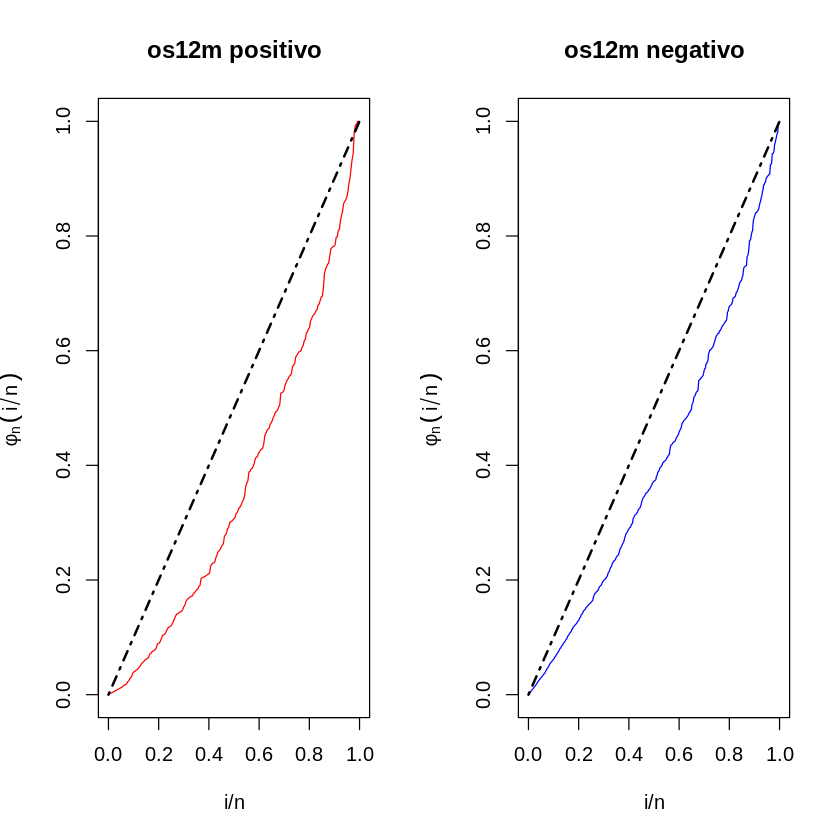

In [ ]:
par(mfrow = c(1, 2))
sim <- std[std$os12m == 1, ]
nao <- std[std$os12m == 0, ]
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = sim), main = "os12m positivo", col = "red")
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = nao), main = "os12m negativo", col = "blue")

## TTTplot para yschool

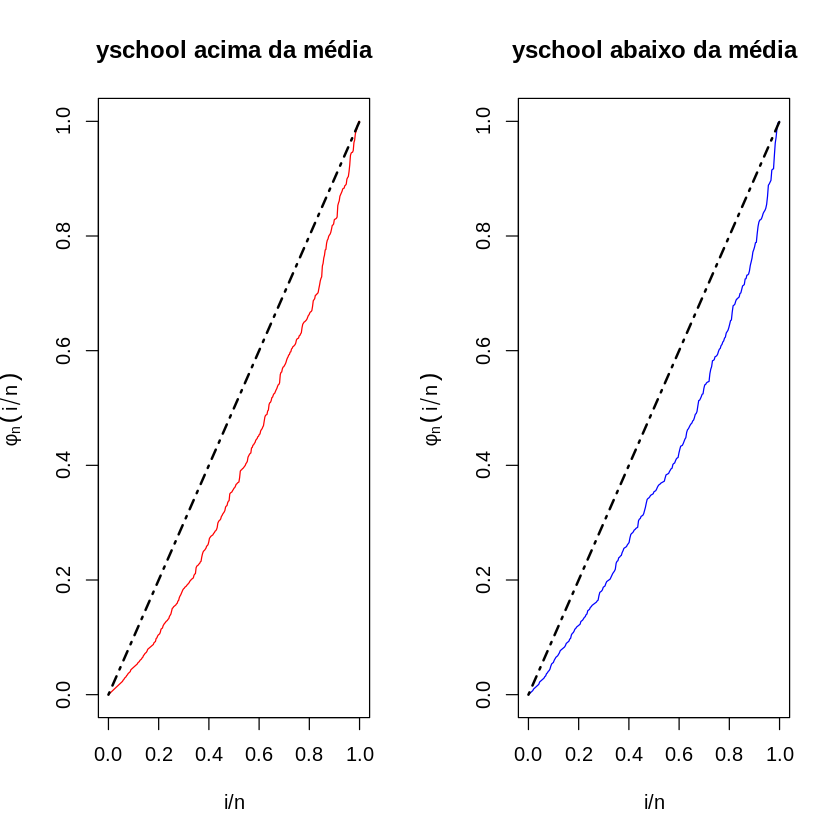

In [ ]:
par(mfrow = c(1, 2))
abaixo <- std[std$yschool_cat == 'Abaixo da Média', ]
acima <- std[std$yschool_cat == 'Acima da Média', ]

plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = acima), main = "yschool acima da média", col = "red")
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = abaixo), main = "yschool abaixo da média", col = "blue")

## TTTplot para npartner

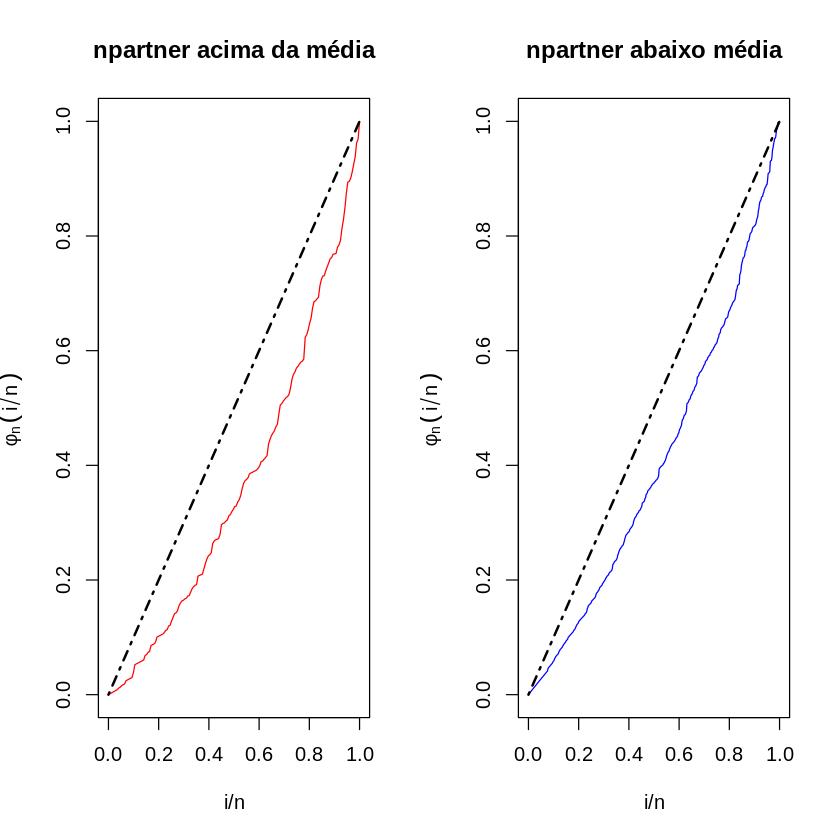

In [ ]:
par(mfrow = c(1, 2))
abaixo <- std[std$npartner_cat == 'Abaixo da Média', ]
acima <- std[std$npartner_cat == 'Acima da Média', ]

plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = acima), main = "npartner acima da média", col = "red")
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = abaixo), main = "npartner abaixo média", col = "blue")

Comentário: Para ambas as variáveis as curvas de risco apresentam comportamento decrescente, visto que em todos os casos, estão abaixo da linha tracejada.

# Questão 07) Usando usando as variáveis time, rinfct e as covariáveis os12m (Realização de sexo oral nos últimos 12 meses),  yschool (Anos    de    estudo) npartner (Número    de    parceiros    nos    últimos    30    dias) abdpain    (Presença    de    dor    abdominal    (1=sim    e    0=não) )  construa um teste de log-rank para cada uma das covariáveis  e com base nos resultados obtidos classifique as seguintes afirmações em verdadeiro (V) ou falso (F).

In [ ]:
temp = std$time
cens = std$rinfct
os12m = std$os12m
yschool = std$yschool
npartner = std$npartner
abdpain = std$abdpain
data = tibble(temp=temp, cens=cens, os12m=os12m, yschool=yschool, npartner=npartner,
abdpain=abdpain)

Testes

In [ ]:
survdiff(Surv(temp,cens)~(abdpain), data=data)

Call:
survdiff(formula = Surv(temp, cens) ~ (abdpain), data = data)

            N Observed Expected (O-E)^2/E (O-E)^2/V
abdpain=0 751      291    303.7     0.527      4.24
abdpain=1 126       56     43.3     3.693      4.24

 Chisq= 4.2  on 1 degrees of freedom, p= 0.04 

In [ ]:
survdiff(Surv(temp,cens)~(os12m >= mean(os12m)), data=data)

Call:
survdiff(formula = Surv(temp, cens) ~ (os12m >= mean(os12m)), 
    data = data)

                             N Observed Expected (O-E)^2/E (O-E)^2/V
os12m >= mean(os12m)=FALSE 589      267      226      7.25      20.9
os12m >= mean(os12m)=TRUE  288       80      121     13.62      20.9

 Chisq= 20.9  on 1 degrees of freedom, p= 5e-06 

In [ ]:
survdiff(Surv(temp,cens)~(npartner >= mean(npartner)), data=data)

Call:
survdiff(formula = Surv(temp, cens) ~ (npartner >= mean(npartner)), 
    data = data)

                                   N Observed Expected (O-E)^2/E (O-E)^2/V
npartner >= mean(npartner)=FALSE 677      263    272.4     0.322      1.51
npartner >= mean(npartner)=TRUE  200       84     74.6     1.176      1.51

 Chisq= 1.5  on 1 degrees of freedom, p= 0.2 

In [ ]:
survdiff(Surv(temp,cens)~(yschool >= mean(yschool)), data=data)

Call:
survdiff(formula = Surv(temp, cens) ~ (yschool >= mean(yschool)), 
    data = data)

                                 N Observed Expected (O-E)^2/E (O-E)^2/V
yschool >= mean(yschool)=FALSE 388      179      149      6.07      10.7
yschool >= mean(yschool)=TRUE  489      168      198      4.56      10.7

 Chisq= 10.7  on 1 degrees of freedom, p= 0.001 

## Item verdadeiros

### A) O teste de log-rank revela uma estatística de teste de 4.2 e um p-valor de 0.04, indicando uma diferença significativa entre as curvas de sobrevivência dos grupos com e sem presença de dor abdominal.

Comentário: Esse item é verdadeiro, pois, do resultado do teste, temos que a estatística de teste igual a 4.2, com p-valor de 0.04. Assim, considerando um nível de significância de 0.05, rejeitamos a possibilidade de igualdade entre os grupos. A conclusão é que há uma diferença significativa entre os grupos.

### C) Após análise do teste de LogRank com um nível de significância de 5%, constatou-se que as funções de sobrevivência que não apresentam diferenças significativas entre as categorias, ou seja, em que não foi possível rejeitar a hipótese nula, referem-se ao número de parceiros nos    últimos    30    dias. Por outro lado, as variáveis relacionadas à presença de dor abdominal, prática de sexo oral nos últimos 12 meses e anos de estudo demonstraram diferenças significativas entre as funções de sobrevivência das categorias.

comentário: Este item é verdadeiro, pois apenas para a covariável ***npartner*** não rejeita-se a hipótese de não existência de diferença signicativa entre as curvas, visto que, apenas para ela, o *p-valor > $\alpha$*.

Com isso, a resposta corretá é **VFVF**

# Questão 8) Com base no conhecimento adquirido em sala de aula e utilizando a variável time, determine a matriz de covariância e as estimativas de máxima verossimilhança considerando censura à direita e distribuição Weibull com a parametrização

$f(t)=(σμ)(tμ)σ−1e−(t/μ)σ,y,μ,σ>0$


Com base nos resultados obtidos classifica os itens como verdadeiro ou falso:

In [ ]:
# Carregando pacotes ------------------------------------------------------
# ---
  library(gamlss)
  library(gamlss.cens)
  library(broom)
  library(tidyverse)
  library(pammtools)
  library(numDeriv)

# Carregando dados --------------------------------------------------------
# ---
  data <- std
  t = std$time
  cens = std$rinfct
  dados = tibble(tempos=t, cens=cens)

# Kaplan-Meier ------------------------------------------------------------
# ---
  ekm = survfit(Surv(tempos,cens)~1, data=dados)
  dadosAux =
    tidy(ekm) %>%
    dplyr::rename(
      'S' = 'estimate',
      't' = 'time',
      'liS' = 'conf.low',
      'lsS' = 'conf.high',
      'nEvento' = 'n.event'
    ) %>%
    dplyr::select(t,S,liS,lsS,nEvento) %>%
    bind_rows(tibble(t=0,S=1,liS=1,lsS=1,nEvento=0))

  G =
    dadosAux %>%
    ggplot() +
    geom_step(aes(x=t, y=S), size=0.4) +
    geom_stepribbon(aes(x=t, ymin=liS, ymax=lsS), alpha=0.15) +
    geom_point(data=dadosAux %>% filter(nEvento==0,t>0), aes(x=t, y=S), shape=3, size=3) +
    coord_cartesian(ylim=c(0,1), xlim=c(0,max(dadosAux$t))) +
    labs(x='t (meses)', y='S(t)') +
    theme_minimal() +
    theme(legend.position='bottom'); G

# Estimacao de maxima verossimilhanca (com o pacote gamlss) ---------------
# ---
  # GA: Gamma
  # WEI: Weibull
  # LOGNO: Log-Normal
  # IG: Inversa-Gaussiana
  gen.cens(WEI)
  mod = gamlss(
    formula=Surv(tempos,cens)~1,
    family=WEIrc(mu.link = 'identity', sigma.link = 'identity'),
    data=dados
  )

  # informe a sigla correspondente para a distribuição escolhida
  # ---
  dist = 'WEI'

# Estimativas de maxima verossimilhanca e matriz de variancias -----------
# ---
  emv = c(
    mu = mod$mu.coefficients %>% as.numeric(),
    sigma = mod$sigma.coefficients %>% as.numeric()
  )
  mcov = vcov(mod)

# Estimativas para a mediana --------------------------------------------
# ---
  # LOG MEDIANA
  # ---
  logm = function(par){ log( do.call(paste0('q',dist), c(list(p=0.5), par)) ) }
  derivada.logm = grad(func=logm, x=emv)

  logm.pt = logm(emv)
  ep.logm = sqrt( c( derivada.logm %*% mcov %*% derivada.logm ) )

  logm.li = logm.pt-qnorm(0.975)*ep.logm
  logm.ls = logm.pt+qnorm(0.975)*ep.logm

  mediana.pt = exp( logm.pt )
  mediana.li = exp( logm.li )
  mediana.ls = exp( logm.ls )
summary(mod)

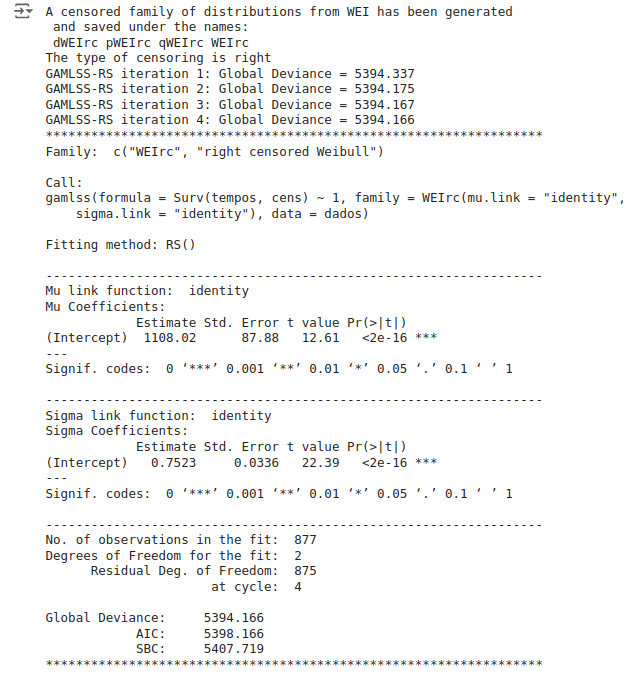

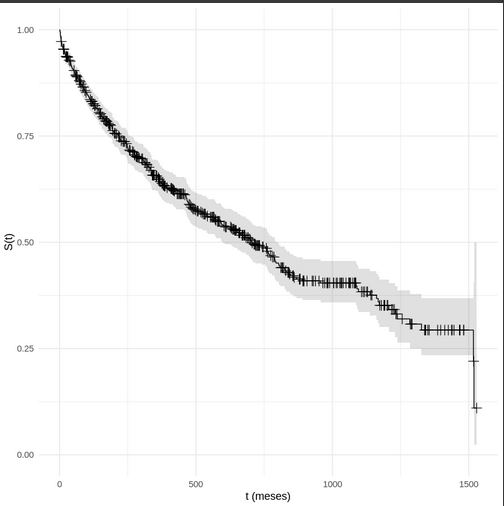

In [ ]:
mcov

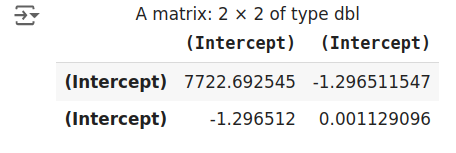

Comentário; Como se vê, a estimação para $\mu$ = 1108.03 e para $\alpha$ = 0.7523. Os erros padrões, respectivamente, foram de 87.84 e de 0.336. Observa-se também que, para ambos estimadores, o p-valor pertencente à região crítica. Assim, pode-se rejeitar a hipótese nula em um nível de significância de 0.05, Diante do resultado, a conclusão é que há diferenças estatisticamente  significativas. Temos também que o modelo retornou uma matriz de variância e covariância diferente da apresentada no item c). Dessa forma,a resposta correta é FVFF.

# Questão 09) Analise os comportamentos dos gráficos das respectivas funções S(t),h(t),H(t) e f(t) $ e classifique as seguintes afirmações.

In [ ]:
G0.S =
G +
geom_line(data=dadosAux, aes(x=t, y=S.pt), colour='red', linewidth=1.25) +
geom_ribbon(data=dadosAux, aes(x=t, ymin=S.li, ymax=S.ls), fill='red', alpha=0.15) +
geom_segment(aes(x=mediana.li, xend=mediana.ls, y=0, yend=0), colour='red', linewidth=1.25) +
geom_point(aes(x=mediana.pt, y=0), colour='red', size=3) +
geom_vline(aes(xintercept=mediana.pt), colour='red', linewidth=0.25, linetype='dashed') +
geom_hline(aes(yintercept=0.5), colour='red', linewidth=0.25, linetype='dashed') +
geom_label(aes(x=mediana.pt, y=0, label='Tempo Mediano\nde Falha'), colour='red', size=3, vjust=-0.5, check_overlap=TRUE) +
labs(title='SOBREVIVÊNCIA') +
theme(
legend.position='bottom',
plot.title = element_text(face='bold', hjust=0.5, size=16)
); G0

ERROR: Error in eval(expr, envir, enclos): object 'dadosAux' not found


ERROR: Error in eval(expr, envir, enclos): object 'G0' not found


In [ ]:
# Carregando dados --------------------------------------------------------
# ---
  t = c(60, 84, 22, 54, 80, 37, 18, 29, 40, 83, 80,
        80, 35, 52, 21, 40, 22, 85, 39, 16, 21)
  cens = c( 1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  1,
            0,  1,  1,  1,  1,  1,  0,  1,  1,  1)

  dados = tibble(tempos=t, cens=cens)

# Kaplan-Meier ------------------------------------------------------------
# ---
  ekm = survfit(Surv(tempos,cens)~1, data=dados)
  dadosAux =
    tidy(ekm) %>%
    dplyr::rename(
      'S' = 'estimate',
      't' = 'time',
      'liS' = 'conf.low',
      'lsS' = 'conf.high',
      'nEvento' = 'n.event'
    ) %>%
    dplyr::select(t,S,liS,lsS,nEvento) %>%
    bind_rows(tibble(t=0,S=1,liS=1,lsS=1,nEvento=0))

  G =
    dadosAux %>%
    ggplot() +
    geom_step(aes(x=t, y=S), size=0.4) +
    geom_stepribbon(aes(x=t, ymin=liS, ymax=lsS), alpha=0.15) +
    geom_point(data=dadosAux %>% filter(nEvento==0,t>0), aes(x=t, y=S), shape=3, size=3) +
    coord_cartesian(ylim=c(0,1), xlim=c(0,max(dadosAux$t))) +
    labs(x='t (meses)', y='S(t)') +
    theme_minimal() +
    theme(legend.position='bottom'); G

# Estimacao de maxima verossimilhanca (com o pacote gamlss) ---------------
# ---
  # GA: Gamma
  # WEI: Weibull
  # LOGNO: Log-Normal
  # IG: Inversa-Gaussiana
  gen.cens(WEI)
  mod = gamlss(
    formula=Surv(tempos,cens)~1,
    family=WEIrc(mu.link = 'identity', sigma.link = 'identity'),
    data=dados
  )

  # informe a sigla correspondente para a distribuição escolhida
  # ---
  dist = 'WEI'

# Estimativas de maxima verossimilhanca e matriz de variancias -----------
# ---
  emv = c(
    mu = mod$mu.coefficients %>% as.numeric(),
    sigma = mod$sigma.coefficients %>% as.numeric()
  )
  mcov = vcov(mod)

# Estimativas para a mediana --------------------------------------------
# ---
  # LOG MEDIANA
  # ---
  logm = function(par){ log( do.call(paste0('q',dist), c(list(p=0.5), par)) ) }
  derivada.logm = grad(func=logm, x=emv)

  logm.pt = logm(emv)
  ep.logm = sqrt( c( derivada.logm %*% mcov %*% derivada.logm ) )

  logm.li = logm.pt-qnorm(0.975)*ep.logm
  logm.ls = logm.pt+qnorm(0.975)*ep.logm

  mediana.pt = exp( logm.pt )
  mediana.li = exp( logm.li )
  mediana.ls = exp( logm.ls )

# Estimativas para as curvas --------------------------------------------
# ---
  dadosAux =
    tibble(t=seq(1e-5,max(t),l=100)) %>%
      mutate(
        densidade = purrr::map(.x=t, .f=function(x){

          # LOG DENSIDADE
          # ---
          logd = function(par){ do.call(paste0('d',dist), c(list(x=x), par, log=TRUE))           }
          derivada.logd = grad(func=logd, x=emv)

          log.pt = logd(emv)
          ep.log = sqrt( c( derivada.logd %*% mcov %*% derivada.logd ) )

          log.li = log.pt-qnorm(0.975)*ep.log
          log.ls = log.pt+qnorm(0.975)*ep.log

          tibble(
            d.pt = exp(log.pt),
            d.li = exp(log.li),
            d.ls = exp(log.ls)
          )

        })
      ) %>%
      mutate(
        risco = purrr::map(.x=t, .f=function(x){

          # LOG RISCO
          # ---
          logh = function(par){
            do.call(paste0('d',dist), c(list(x=x), par, log=TRUE)) -
              do.call(paste0('p',dist), c(list(q=x), par, log=TRUE, lower.tail=FALSE))
          }
          derivada.logh = grad(func=logh, x=emv)

          log.pt = logh(emv)
          ep.log = sqrt( c( derivada.logh %*% mcov %*% derivada.logh ) )

          log.li = log.pt-qnorm(0.975)*ep.log
          log.ls = log.pt+qnorm(0.975)*ep.log

          tibble(
            h.pt = exp(log.pt),
            h.li = exp(log.li),
            h.ls = exp(log.ls)
          )

        })
      ) %>%
      mutate(
        riscoAcumulado = purrr::map(.x=t, .f=function(x){

          # LOG RISCO ACUMULADO
          # ---
          logH = function(par){
            H = -log( do.call(paste0('p',dist), c(list(q=x), par, log=FALSE, lower.tail=FALSE)) )
            log(H)
          }
          derivada.logH = grad(func=logH, x=emv)

          log.pt = logH(emv)
          ep.log = sqrt( c( derivada.logH %*% mcov %*% derivada.logH ) )

          log.li = log.pt-qnorm(0.975)*ep.log
          log.ls = log.pt+qnorm(0.975)*ep.log

          tibble(
            H.pt = exp(log.pt),
            H.li = exp(log.li),
            H.ls = exp(log.ls)
          )

        })
      ) %>%
      mutate(
        sobrevivencia = purrr::map(.x=t, .f=function(x){

          # LOG-LOG SOBREVIVENCIA
          # ---
          loglogS = function(par){
            log(-log( do.call(paste0('p',dist), c(list(q=x), par, log=FALSE, lower.tail=FALSE)) ) )
          }
          derivada.loglogS = grad(func=loglogS, x=emv)

          loglog.pt = loglogS(emv)
          ep.loglog = sqrt( c( derivada.loglogS %*% mcov %*% derivada.loglogS ) )

          loglog.li = loglog.pt-qnorm(0.975)*ep.loglog
          loglog.ls = loglog.pt+qnorm(0.975)*ep.loglog

          tibble(
            S.pt = exp(-exp(loglog.pt)),
            S.li = exp(-exp(loglog.li)),
            S.ls = exp(-exp(loglog.ls))
          )

        })
      ) %>%
      unnest_legacy();

In [ ]:
# Graficos das curvas estimadas -----------------------------------------
# ---
  G0.S =
    G +
    geom_line(data=dadosAux, aes(x=t, y=S.pt), colour='red', linewidth=1.25) +
    geom_ribbon(data=dadosAux, aes(x=t, ymin=S.li, ymax=S.ls), fill='red', alpha=0.15) +
    geom_segment(aes(x=mediana.li, xend=mediana.ls, y=0, yend=0), colour='red', linewidth=1.25) +
    geom_point(aes(x=mediana.pt, y=0), colour='red', size=3) +
    geom_vline(aes(xintercept=mediana.pt), colour='red', linewidth=0.25, linetype='dashed') +
    geom_hline(aes(yintercept=0.5), colour='red', linewidth=0.25, linetype='dashed') +
    geom_label(aes(x=mediana.pt, y=0, label='Tempo Mediano\nde Falha'), colour='red', size=3, vjust=-0.5, check_overlap=TRUE) +
    labs(title='SOBREVIVÊNCIA') +
    theme(
      legend.position='bottom',
      plot.title = element_text(face='bold', hjust=0.5, size=16)
    ); G0.S

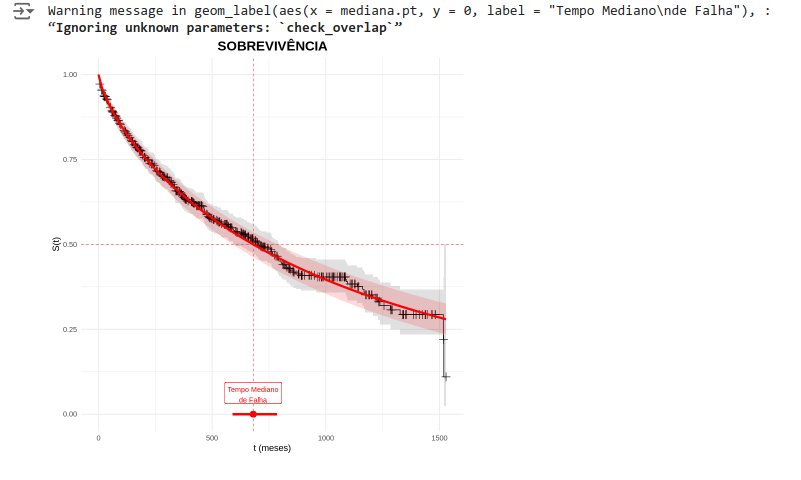

Com base na curva de sobrevivência, considera-se verdadeira a afirmação: *A tendência da curva da função de sobrevivência é manter-se e não cair para zero o que sugere-nos que há indivíduos que não vão se reinfectar com doenças sexualmente transmissíveis durante o período de observação.*

In [ ]:
 G0.h =
    dadosAux %>%
    ggplot() +
    geom_line(aes(x=t, y=h.pt), colour='red', linewidth=1.25) +
    geom_ribbon(aes(x=t, ymin=h.li, ymax=h.ls), fill='red', alpha=0.15) +
    coord_cartesian(ylim=c(0,0.05), xlim=c(0,max(dadosAux$t))) +
    labs(x='t (meses)', y='h(t)', title='RISCO') +
    theme_minimal() +
    theme(
      legend.position='bottom',
      plot.title = element_text(face='bold', hjust=0.5, size=16)
    ); G0.h

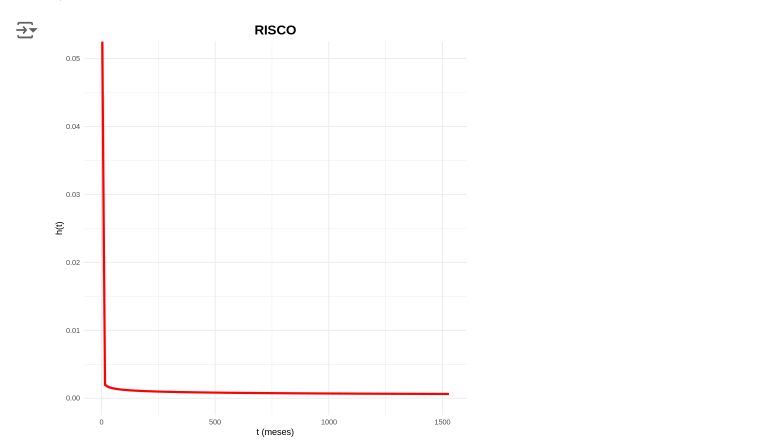

Com base na curva do risco, considera-se falsa a afirmação: *A tendência da curva da função de risco é crescente ao longo do tempo, isso indica que o risco de um paciente de reinfectar-se com doenças sexualmente transmissíveis aumentam à medida que os dias passam.*

In [ ]:
G0.d =
    dadosAux %>%
    ggplot() +
    geom_line(aes(x=t, y=d.pt), colour='red', linewidth=1.25) +
    geom_ribbon(aes(x=t, ymin=d.li, ymax=d.ls), fill='red', alpha=0.15) +
    coord_cartesian(ylim=c(0,0.02), xlim=c(0,max(dadosAux$t))) +
    labs(x='t (meses)', y='f(t)', title='DENSIDADE') +
    theme_minimal() +
    theme(
      legend.position='bottom',
      plot.title = element_text(face='bold', hjust=0.5, size=16)
    ); G0.d

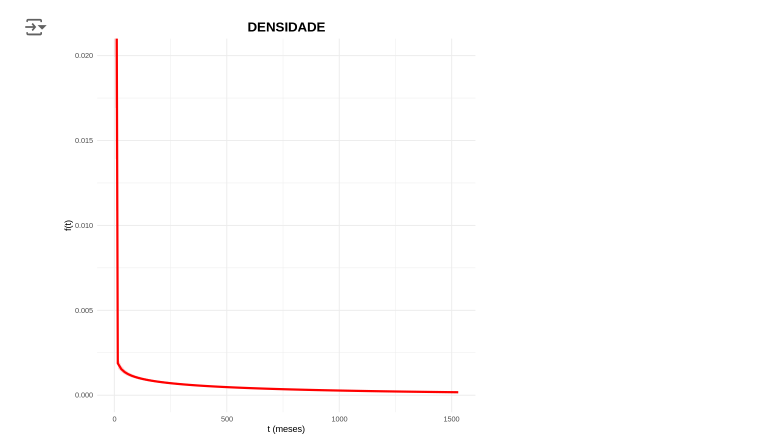

Com base na curva de densidade, considera-se Verdadeira a afirmação: *A função de densidade descreve a distribuição dos tempos e sua forma decrescente sugere que a reinfecção com doenças sexualmente transmissíveis é mais prováveis no início do acompanhamento*


In [ ]:
  G0.H =
    dadosAux %>%
    ggplot() +
    geom_line(aes(x=t, y=H.pt), colour='red', linewidth=1.25) +
    geom_ribbon(aes(x=t, ymin=H.li, ymax=H.ls), fill='red', alpha=0.15) +
    coord_cartesian(xlim=c(0,max(dadosAux$t))) +
    labs(x='t (meses)', y='H(t)', title='RISCO ACUMULADO') +
    theme_minimal() +
    theme(
      legend.position='bottom',
      plot.title = element_text(face='bold', hjust=0.5, size=16)
    ); G0.H

  G0 = ggpubr::ggarrange(G0.d,G0.S,G0.h,G0.H, ncol=2, nrow=2); G0

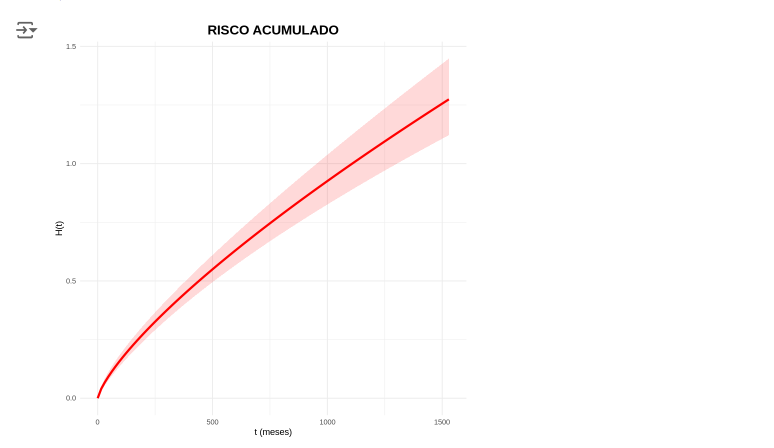

Com base na curva do risco acumulado, considera-se Verdadeira a afirmação:  *À medida que os dias passam, a função de risco acumulado se incrementa, refletindo o risco total de que os pacientes se reinfectem com doenças sexualmente transmissíveis.*

In [ ]:
print(paste("mediana:", mediana.pt, "IC: [", mediana.li, ";",
mediana.ls, "]"))

[1] "mediana: 680.732438514362 IC: [ 590.657875699337 ;
784.543255767224 ]

In [ ]:
paste("soma:", sum(table(std$iinfct)))

[1] "soma: 877"

In [ ]:
logm = function(par){ log( do.call(paste0('p',dist), c(list(q=201),
par)) ) }
derivada.logm = grad(func=logm, x=emv)
logm.pt = logm(emv)
ep.logm = sqrt( c( derivada.logm %*% mcov %*% derivada.logm ) )
prob = exp( logm.pt )
print(paste("Probabilidade:", 1 - round(prob, 3)))

[1] "Probabilidade: 0.758"

In [ ]:
ogm = function(par){ log( do.call(paste0('q',dist),
c(list(p=0.277), par)) ) }
derivada.logm = grad(func=logm, x=emv)
logm.pt = logm(emv)
ep.logm = sqrt( c( derivada.logm %*% mcov %*% derivada.logm ) )
prob = exp( logm.pt )
print(paste("Probabilidade:", round(prob, 3)))

[1] "Probabilidade: 248.077"

Dois itens obtemos que:

*   a) o tempo mediano até a reinfecção nos pacientes é de 680.7324 dias, logo este item está correto.
*   b) este item também está correto, pois dado que um paciente teve uma infecção inicial por gonorreia ou clamídia, a probabilidade de esse mesmo paciente ter uma reinfecção mais de 201 dias após essa infecção é de 0.7581644.
*   c) este item não está correto, pois a probabilidade de esse paciente ter uma reinfecção até 201 dias após a infecção inicial é de 1 - 0.7581644 = 0.2418356, portanto, a afirmativa dada no enunciado é incorreta.
*   d) Este item está incorreto, pois o intervalo de confiança para o tempo mediano até a reinfecção é [590.6225; 784.5874].